In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
import ipywidgets as widgets
from ipywidgets import interact, fixed, Dropdown, Checkbox, FloatSlider, IntSlider, Output, VBox, HBox

from numpy import cos, sin, tan, arctan, exp, log, pi, array, linspace, arange, sqrt, meshgrid
from numpy.linalg import norm
from mpl_toolkits import mplot3d

%matplotlib widget



# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

plt.rcParams.update({
    'figure.figsize': (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [14]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}
</style>

# One-minute Review

  - Local mins and maxes occur at critical points (usually where $\nabla f = \vec 0$).
  - Critical points with no local extrema are saddle points
  - 2nd Derivative Test: $$D = \begin{vmatrix} f_{xx} & f_{xy} \\ f_{xy} & f_{yy} \end{vmatrix}_{(a,b)}$$

Then, 
  - if $D>0$ and $f_{xx} < 0$, $f(a,b)$ is a local maximum.
  - if $D>0$ and $f_{xx} > 0$, $f(a,b)$ is a local minimum.
  - if $D<0$, $(a,b)$ is a saddle point. 

Otherwise, the test is inconclusive.

<p style="padding-bottom:40%;"> </p>

# Lecture 13

  - Objectives
    - Identify open and closed sets
    - Solve unconstrained optimization problems
    - Solve constrained optimization problems (Lagrange Multipliers)
    
    
  - Resources
    - Content
      - Stewart: §14.8
      - New Strang: [§4.8](https://openstax.org/books/calculus-volume-3/pages/4-8-lagrange-multipliers)
    - Practice
      - Mooculus: [Constrained Optimization](https://ximera.osu.edu/mooculus/calculus3/constrainedOptimization/digInConstrainedOptimization) [Lagrange Multipliers](https://ximera.osu.edu/mooculus/calculus3/lagrangeMultipliers/digInLagrangeMultipliers)
    - Extras
      - CalcBLUE: [Optimization](https://www.youtube.com/watch?v=CBWMHf1MfEs&list=PL8erL0pXF3JZZTnqjginERYYEi1WpLE_V&index=110) 

## Definitions 

A set $S$ is **open** if all points are interior points.

A set $S$ is **closed** if it contains all its boundary points.

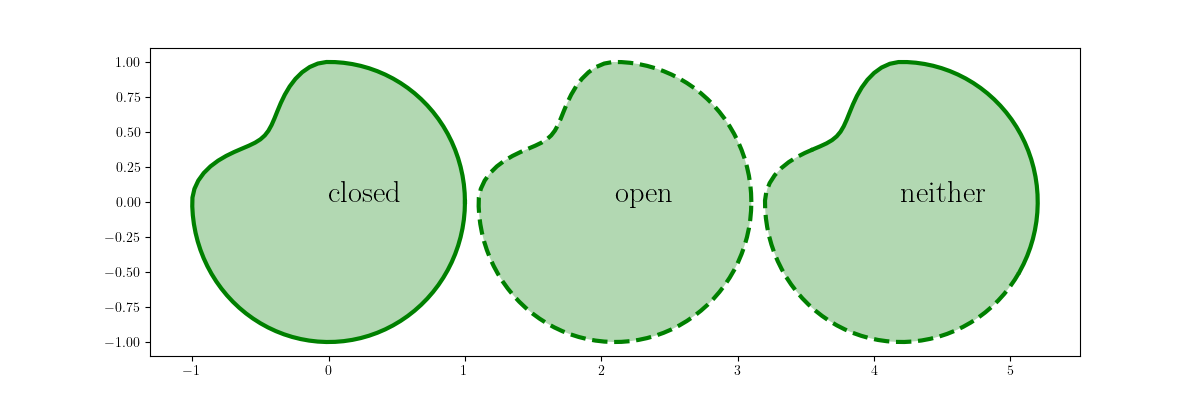

In [23]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(12,4))
    plt.ion()
    
    def rr(t):
        if pi/2 < t < pi:
            return 2/3+1/3*cos(2*t)**2
        else:
            return 1.

    rr = np.vectorize(rr)

    t = np.linspace(0,np.pi*2,100)

    ax.fill(rr(t)*cos(t),rr(t)*sin(t),'g',alpha=.3)
    ax.plot(rr(t)*cos(t),rr(t)*sin(t),'-g',2.1+rr(t)*cos(t),rr(t)*sin(t),'--g',lw=3)
    ax.fill(rr(t)*cos(t)+2.1,rr(t)*sin(t),'g',alpha=.3)
    ax.fill(rr(t)*cos(t)+2*2.1,rr(t)*sin(t),'g',alpha=.3)
    t=np.linspace(-pi/6,5*pi/6,50)
    ax.plot(4.2+rr(t)*cos(t),rr(t)*sin(t),'-g',4.2+rr(t+pi)*cos(t+pi),rr(t+pi)*sin(t+pi),'--g',lw=3);
    ax.text(2.1,0,"open",fontsize=22);
    ax.text(4.2,0,"neither",fontsize=22);
    ax.text(0,0,"closed",fontsize=22);
    
    return fig.canvas

a("open/closed")

<p style="padding-bottom:40%;"> </p>

## Optimization


<div class="alert alert-block alert-info shadow">     
<h3>Fermat's Little Theorem</h3>

<p>If a local maximum or minimum of a function $f:D\to \RR$ occurs at an interior point $\vec p$, then $\vec p$ is a critical point of $f$. </p>
</div>



<div class="alert alert-block alert-info shadow"> 
<h3>Extreme Value Theorem</h3>
    
<p>If $D\in \RR^n$ is closed and bounded and $f:D\to \RR$ is continuous, then there is an $\vec x \in D$ such that $f(\vec x)$ is the <b>global maximum</b>. That is, $f(\vec y) \leq f(\vec x)$.  </p>
</div>

The same holds for the global minimum, mutatis mutandis. 

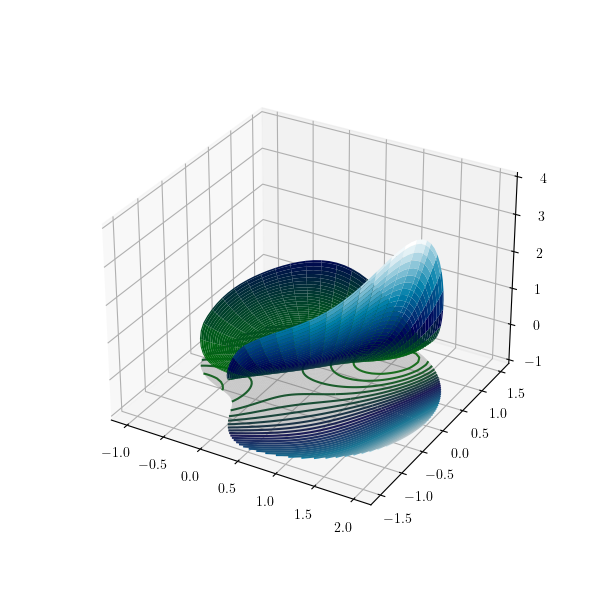

In [16]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d')
    
    def rr(t):
        if pi/2 < t < pi:
            return 2/3+1/3*cos(2*t)**2
        else:
            return 1.

    rr = np.vectorize(rr)

    th = linspace(0,2*pi,100)
    r = linspace(0,1,100)
    r,th = meshgrid(r,th)
    X = 3/2*r * rr(th-pi/2) *cos(th) + 1/2
    Y = 3/2*r * rr(th-pi/2) *sin(th)
    Z = X**4 + Y**4 - 4*X*Y - 1
    ax.plot_surface(X,Y,0*Z - 1,color='gray',alpha=.3)
    ax.plot_surface(X,Y,Z/4,cmap='ocean')
    ax.contour(X,Y,Z/4,offset=-1,levels=32,cmap='ocean')
    ax.set_zlim(-1,4)
    
    
    return fig.canvas

a("Global mins/maxes")

[3Demos version](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&obj0_kind=curve&obj0_params_a=0&obj0_params_b=2*pi&obj0_params_x=1%2F2+%2B+3%2F2%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+cos%28t%29&obj0_params_y=3%2F2%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+sin%28t%29&obj0_params_z=0&obj0_params_tau=0&obj1_kind=curve&obj1_params_a=0&obj1_params_b=2*pi&obj1_params_x=1%2F2+%2B+3%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+cos%28t%29&obj1_params_y=3%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+sin%28t%29&obj1_params_z=%28%281%2F2+%2B+3%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+cos%28t%29%29%5E4+%2B+%283%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+sin%28t%29%29%5E4+-+4*%281%2F2+%2B+3%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+cos%28t%29%29*%283%2F2*%28t+%3E+pi%2F2+%26+t+%3C+pi+%3F+%282%2F3%2B1%2F3*cos%282*t%29%5E2%29+%3A+1%29*+sin%28t%29%29+-+1%29+%2F10+%2B+.5&obj1_params_tau=0&obj2_kind=graph&obj2_params_a=-1&obj2_params_b=2&obj2_params_c=-3%2F2&obj2_params_d=3%2F2&obj2_params_z=%28x%5E4+%2B+y%5E4+-+4*x*y+-+1%29+%2F10+%2B+.5&obj2_params_tau=0&obj2_params_t0=0&obj2_params_t1=1)

<p style="padding-bottom:40%;"> </p>

## Consequences

When trying to find the absolute extrema of a function $f$ on a set $D$, 
  - Find all critical points of $f$ in $D$ (unconstrained optimization). 
  - Find the extremes on the boundary of $D$ (constrained - Lagrange Multipliers).

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

## First Example - Unconstrained optimization.

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

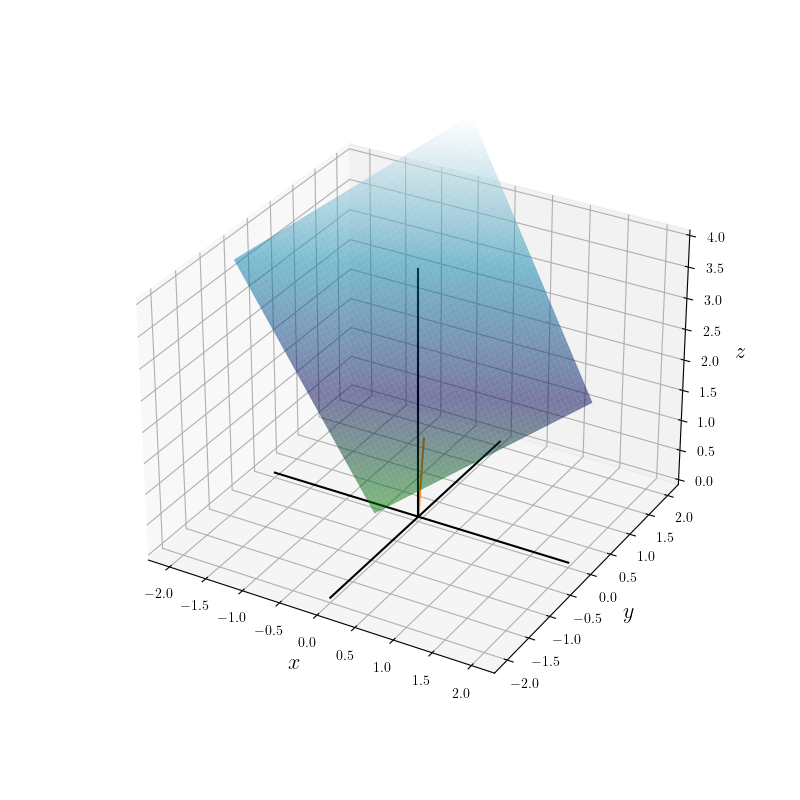

In [17]:
def a():
    fig= plt.figure(num="Nearest point",figsize=(8,8),dpi=100)
    ax = fig.add_subplot(projection='3d')
    x = y = np.linspace(-3/2,3/2,100)
    x,y = np.meshgrid(x,y)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(x,y,x - 2*y + 3,alpha=.5,cmap="ocean")
    ax.set_zlim3d([0,4])
    ax.plot([0,-1/2],[0,1],[0,1/2])
    ax.plot([0,0],[0,0],[0,4],'k')
    ax.plot([0,0],[-2,2],[0,0],'k')
    ax.plot([-2,2],[0,0],[0,0],'k');

a()

<p style="padding-bottom:40%;"> </p>

# Constrained Optimization - Lagrange Multipliers

Below is the contour plot of a function $f$ and a path (in red). Visually find the point on the path with the greatest and least values of $f$  

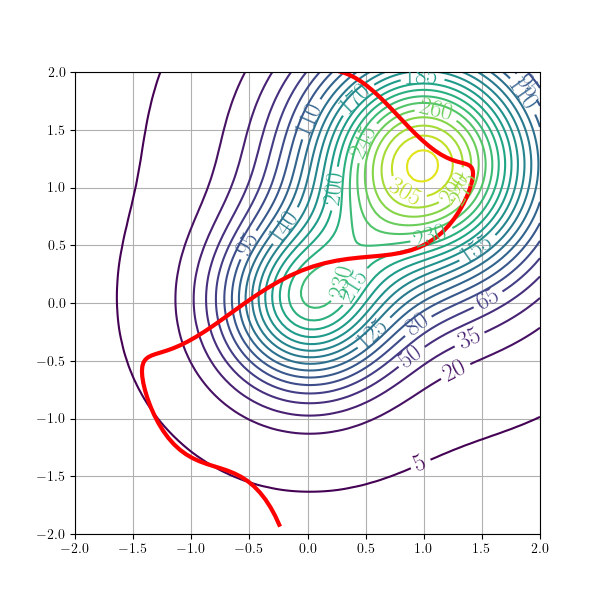

In [18]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    x = y = np.linspace(-2,2,100)
    X,Y = np.meshgrid(x,y)
    ax.grid(True)
    cp = ax.contour(X,Y,4+200*exp(-2*(X**2+Y**2)) + 320*exp(-1*((X-1)**2+(Y-1.2)**2)),levels=np.arange(5,350,15))
    ax.clabel(cp,fmt = "%d",fontsize=18);
    ax.plot(x/2+sin(2*x),.2+.9*x + .1*cos(7*x) - (np.abs(x) - x)**2/48,'-r',lw=3)
    # plt.colorbar();
    ax.set_ylim((-2,2));
    
    return fig.canvas

a("Path through field")



<p style="padding-bottom:40%;"> </p>

v<div class="alert alert-block alert-success shadow"> 
<h3>Theorem - Lagrange Multipliers</h3>
    
<p>If $f(a,b)$ is a local extremum of $f$ <em>subject to the constraint</em> $g(x,y) = c$ and $\nabla g(a,b) \neq \mathbf 0$, then there exists a scalar $\lambda$ such that $$\nabla f = \lambda \nabla g.$$</p>
</div>

In [19]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    slider = FloatSlider(min=-2, max=2, step=0.01, value=-2)
    t = slider.value
    
    f = lambda X,Y: 4+200*exp(-2*(X**2+Y**2)) + 320*exp(-1*((X-1)**2+(Y-1.2)**2))
    h = 1e-4
    x = y = np.linspace(-2,2,100)
    X,Y = np.meshgrid(x,y)
    ax.grid(True)
    cp = ax.contour(X,Y,4+200*exp(-2*(X**2+Y**2)) + 320*exp(-1*((X-1)**2+(Y-1.2)**2)),levels=np.arange(5,350,15))
    ax.clabel(cp,fmt = "%d",fontsize=18);
    rx = lambda x: x/2+sin(2*x)
    ry= lambda x: .2+.9*x + .2*cos(7*x) - (np.abs(x) - x)**2/48
    ax.plot(rx(x),ry(x),'-r',lw=3)
    gfx,gfy = ( (f(rx(t)+h,ry(t)) - f(rx(t),ry(t)))/h*6,(f(rx(t),ry(t)+h) - f(rx(t),ry(t)))/h*6) 
    qu = ax.quiver([rx(t),rx(t)],[ry(t),ry(t)],[gfx/100,(ry(t+h)-ry(t-h))/(h)],[gfy/100,(rx(t+h)-rx(t-h))/(-h)],color=['b','r'])    # plt.colorbar();
    # print(qu, list(ax.collections))
    ax.set_ylim((-2,2));
    
    def update(change):
        t = slider.value
        ax.collections.pop()
        gfx,gfy = ( (f(rx(t)+h,ry(t)) - f(rx(t),ry(t)))/h*6,(f(rx(t),ry(t)+h) - f(rx(t),ry(t)))/h*6) 
        ax.quiver([rx(t),rx(t)],[ry(t),ry(t)],[gfx/100,(ry(t+h)-ry(t-h))/(h)],[gfy/100,(rx(t+h)-rx(t-h))/(-h)],color=['b','r'])    # plt.colorbar();
    
    slider.observe(update, names='value')
    return VBox([slider, fig.canvas])

a("Lagrange 1")

[See demo here.](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=false&flipInfo=true&obj0_kind=curve&obj0_params_a=-2&obj0_params_b=2&obj0_params_x=t%2F2%2Bsin%282*t%29&obj0_params_y=.2%2B.9*t+%2B+.2*cos%287*t%29+-+%28abs%28t%29+-+t%29%5E2%2F48&obj0_params_z=1*exp%28-2*%28%28t%2F2%2Bsin%282*t%29%29%5E2%2B%28.2%2B.9*t+%2B+.2*cos%287*t%29+-+%28abs%28t%29+-+t%29%5E2%2F48%29%5E2%29%29+%2B+3.2%2F2*exp%28-1*%28%28%28t%2F2%2Bsin%282*t%29%29-1%29%5E2%2B%28%28.2%2B.9*t+%2B+.2*cos%287*t%29+-+%28abs%28t%29+-+t%29%5E2%2F48%29-1.2%29%5E2%29%29&obj0_params_tau=0&obj1_kind=curve&obj1_params_a=-2&obj1_params_b=2&obj1_params_x=t%2F2%2Bsin%282*t%29&obj1_params_y=.2%2B.9*t+%2B+.2*cos%287*t%29+-+%28abs%28t%29+-+t%29%5E2%2F48&obj1_params_z=0&obj1_params_tau=0&obj2_kind=graph&obj2_params_a=-2&obj2_params_b=2&obj2_params_c=-2&obj2_params_d=2&obj2_params_z=1*exp%28-2*%28x%5E2%2By%5E2%29%29+%2B+3.2%2F2*exp%28-1*%28%28x-1%29%5E2%2B%28y-1.2%29%5E2%29%29&obj2_params_tau=0&obj2_params_t0=0&obj2_params_t1=1)

<p style="padding-bottom:40%;"> </p>

### Example - Constrained optimization.

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

<p style="padding-bottom:40%;"> </p>

### Example

Find the minimum surface area of a lidless shoebox with volume $32 \text{ L}$.

[See demo here.](https://drew.youngren.nyc/mvc-f20/lagrange-box.html)

<p style="padding-bottom:40%;"> </p>

In [20]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    slider = IntSlider(min=20, max=60, step=1, value=30)
    side = slider.value
    lev = side**2 + 144000/side
    h = 32000/side**2
    s = side
    pl = ax.plot([0, s, s, 0, 0, 0, s, s, 0, 0, s, s, s, s, s, 0, 0, 0], 
                 [0, 0, s, s, 0, 0, 0, s, s, 0, 0, 0, 0, s, s, s, s, 0], 
                 [0, 0, 0, 0, 0, h, h, h, h, h, 0, 0, h, 0, h, 0, h, 0])[0]
    
    x = y = linspace(20,50,100)
    x,y = meshgrid(x,y)
    ax.plot_surface(x,y,32000/(x*y), alpha=.6)
    ax.plot_surface(x,y,(lev - x*y)/(2*x + 2*y),alpha=.4, color='lightblue')
    ax.set_zlim(0,80)
    ax.grid(True)
    
    def update(change):
        s = slider.value
        lev = s**2 + 144000/s
        h = 32000/s**2
        ax.collections.pop()
        ax.plot_surface(x,y,(lev - x*y)/(2*x + 2*y),alpha=.4, color='lightblue')
        pl.set_data_3d([0, s, s, 0, 0, 0, s, s, 0, 0, s, s, s, s, s, 0, 0, 0], 
                 [0, 0, s, s, 0, 0, 0, s, s, 0, 0, 0, 0, s, s, s, s, 0], 
                 [0, 0, 0, 0, 0, h, h, h, h, h, 0, 0, h, 0, h, 0, h, 0])
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Make a box")

<p style="padding-bottom:40%;"> </p>

### Example 

Suppose the temperature distribution on the closed half-disk $0 \leq y \leq \sqrt{16-x^2}$ is given by

$$u(x,y) = x^2 - 6x + 4y^2 - 8y. $$

Find the hottest and coldest points.  

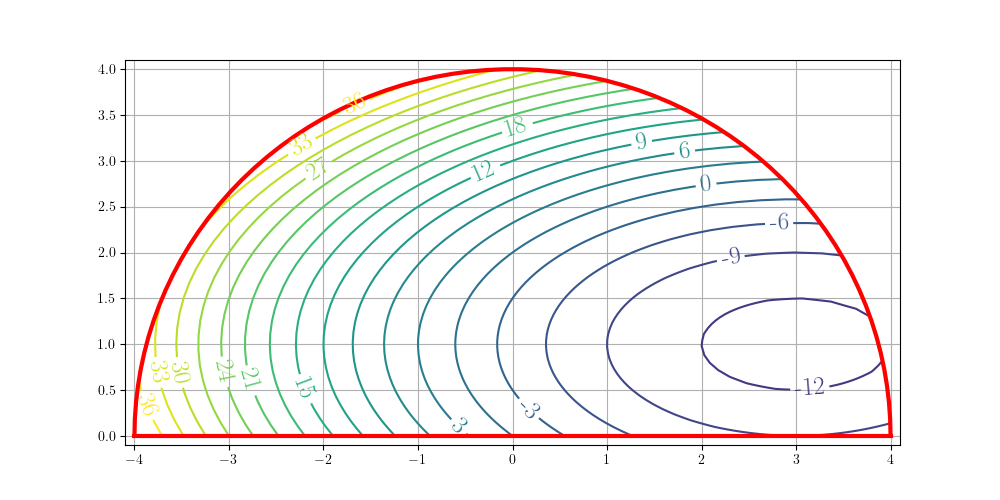

In [21]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(10,5))
    plt.ion()
    
    def u(x,y):
        return x**2 - 6*x + (4*y**2 - 8*y)

    r = np.linspace(0,4,70)
    th = np.linspace(0,np.pi,70)
    R,T = np.meshgrid(r,th)
    ax.grid(True)
    cp = ax.contour(R*cos(T),R*sin(T),u(R*cos(T),R*sin(T)) ,levels=np.arange(-21,39,3))
    ax.clabel(cp,fmt = "%d",fontsize=18);
    ax.plot(4*cos(th),4*sin(th),'-r',lw=3)
    ax.plot(4*cos(th),np.zeros_like(th),'-r',lw=3)
    ax.set_xlim((-4.10,4.1));
    ax.set_ylim((-.10,4.1));
    
    return fig.canvas

a("Max/min Example")



**Solution.** See [this tutorial](../tutorial/SystemsOfEquations.ipynb) for the particulars. 

<p style="padding-bottom:40%;"> </p>

### Exercise

By investing $x$ units of labor and $y$ units of capital, a low-end watch manufacturer can produce $x^{0.4}y^{0.6}$ watches. Find the maximum number of watches that can be produced with a budget of $\$20000$ if labor costs $\$100$ per unit and capital costs $\$200$ per unit.

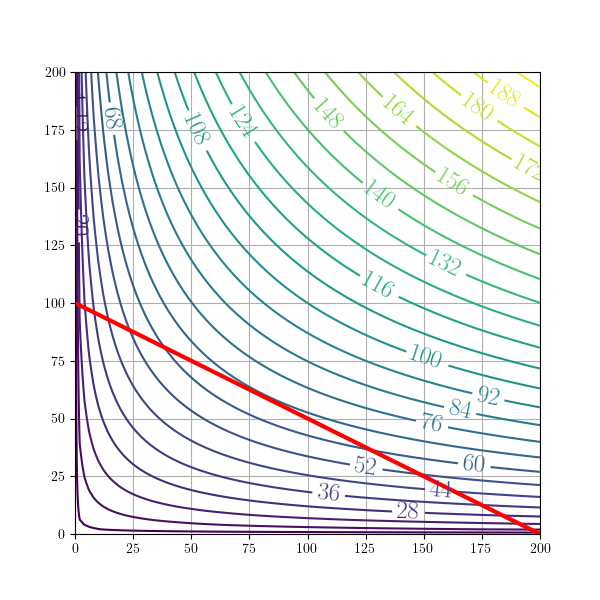

In [22]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    x = y = np.linspace(0,200,100)
    X,Y = np.meshgrid(x,y)

    ax.grid(True)
    cp = plt.contour(X,Y,X**.4*Y**.6,levels=np.arange(4,200,8))
    ax.clabel(cp,fmt = "%d",fontsize=18);
    ax.plot(x,100 - x/2,'-r',lw=3);
    # plt.ylim((-2,2));
    
    return fig.canvas

a("Cobb-Douglas")

